In [11]:
import numpy as np
import matplotlib
import scipy.integrate
matplotlib.rcParams['savefig.dpi'] = 300
import matplotlib.pyplot as plt
import sys
import exact

In [12]:
def p(h_0, x_0, v_0, alpha, g):
    return np.cos(alpha)*v_0*(v_0*np.sin(alpha)+ np.sqrt((v_0*np.sin(alpha))**2+2*g*h_0))/g +x_0


In [30]:
def trapezoidal_integration(f, N):
    """
    Integrates f from a to b using trapezoidal trapezoidal
    """
    x, y = np.mgrid[0:1:N*1j, 0:1:N*1j]
    dx = x[1,0] - x[0, 0]
    dy = y[0,1] - y[0, 0]
    
    
    return (f(x[0,0], y[0,0]) + f(x[-1,0], y[-1,0]) + f(x[-1,-1], y[-1, -1]) + f(x[0,-1], y[0,-1])
            + 2 * np.sum(f(x[0,1:-1], y[0,1:-1])) + 2* np.sum(f(x[-1,1:-1], y[-1,1:-1])) \
            + 2 * np.sum(f(x[1:-1,0], y[1:-1,0])) + 2*np.sum(f(x[1:-1,-1], y[1:-1,-1]))
            + 4 * np.sum(f(x[1:-1,1:-1], y[1:-1,1:-1]))) \
                * dx * dy  / 4


In [58]:
x_0 = 0.2
v_0 =20
alpha = np.pi/8

N = 500

g = 9.81


In [59]:
def scale_alpha(y):
    return (5*np.pi/12)*y

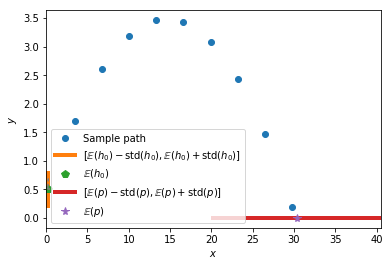

In [60]:
# First plot a sample path
t = np.linspace(0, 1.6, 10)
plt.plot(x_0 + np.cos(alpha)*v_0*t, 0.5 + np.sin(alpha)*v_0*t-0.5*g*t**2, 'o', label='Sample path')


# Plot the different height possibilities
plt.plot([x_0, x_0], [0.5-np.sqrt(1.0/12.0), 0.5+np.sqrt(1.0/12.0)],
    linewidth=4, label='$[\\mathbb{E}(h_0)-\\mathrm{std}(h_0), \\mathbb{E}(h_0)+\\mathrm{std}(h_0)]$')

plt.plot(x_0, 0.5, 'p', markersize=8, label='$\\mathbb{E}(h_0)$')


# Plot the angle ranges
plt.plot([x_0, x_0+0.2*np.cos(5*np.pi/12)], [0.5, 0.5 + 0.2 * np.sin(5*np.pi/12)], '--', color='grey')
plt.plot([x_0, x_0+0.2], [0.5, 0.5], '--', color='grey')


mean = trapezoidal_integration(lambda h_0, y: p(h_0, x_0, v_0, scale_alpha(y), g), N)

variance = trapezoidal_integration(lambda h_0, y: (p(h_0, x_0, v_0, scale_alpha(y), g)-mean)**2, N)
std = np.sqrt(variance)
plt.plot([mean - std, mean+std], [0, 0], linewidth=4,
    label='$[\\mathbb{E}(p)-\\mathrm{std}(p), \\mathbb{E}(p)+\\mathrm{std}(p)]$')
plt.plot([mean], [0], '*', markersize=8, label='$\\mathbb{E}(p)$')
plt.legend()
plt.xlim([0, mean+std])

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.savefig('uncertain_height_angle.png')

plt.show()





# Convergence plots

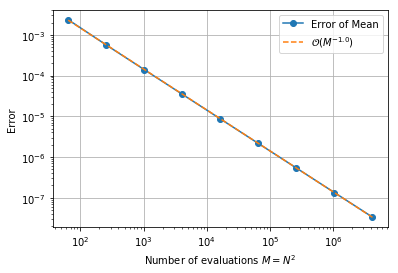

In [37]:


resolutions = 2**np.arange(3, 12)

errors_mean = []

# We just use a reference solution here
mean_exact = scipy.integrate.dblquad(lambda h_0, y: p(h_0, x_0, v_0, scale_alpha(y), g), 
                               0, 1, lambda x: 0, lambda x: 1)[0]


for resolution in resolutions:

    mean = trapezoidal_integration(lambda h_0, y: p(h_0, x_0, v_0, scale_alpha(y), g), resolution)
    errors_mean.append(np.abs(mean-mean_exact))
errors_mean = np.array(errors_mean, dtype=np.float64)

plt.loglog(resolutions**2, errors_mean, '-o', label='Error of Mean')
fitted = np.polyfit(np.log(resolutions**2), np.log(errors_mean), 1)
plt.loglog(resolutions**2, np.exp(fitted[1])*resolutions**(2*fitted[0]), '--',
    label='$\\mathcal{{O}}(M^{{{:.1f}}})$'.format(fitted[0]))
plt.xlabel('Number of evaluations $M=N^2$')
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.savefig('uncertain_height_angle_convergence.png')
plt.show()
